<a href="https://colab.research.google.com/github/nuentsa/cloud-data-tools/blob/main/runtastic_data/extract_and_load_adidas_running_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Option 1: Retrieve the Runtastic Zip File from Google Drive
# This is the fastest option to get the file as it is readily available in Google drive to process multiple times

from pickle import TRUE
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import userdata
import os

# We will save and unzip  the  runtastic file here.
work_dir = "/home/runtastic/"
os.makedirs(work_dir, exist_ok=True)
runtastic_file_path = os.path.join(work_dir, "runtastic_data_export.zip")


# This File ID is the identifier of your zip file stored in Google Drive
# Oonce you store the zip file in Google drive, retrieve its identifier to store it as secrets in Google Colab
# It should look like this laggVyWshwcyP6kEI-y_W3P8D26sz
runtastic_file_id = userdata.get('runtastic_file_id')

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.

uploaded_file = drive.CreateFile({'id': runtastic_file_id})
uploaded_file.GetContentFile(runtastic_file_path)


In [ ]:
# @title Option 2: Retrieve the Runtastic Zip file from local computer
# This is the slowest option as you will need to upload it anytime you want to process the file

from google.colab import files
import shutil

# We will save and unzip  the  runtastic file here.
work_dir = "/home/runtastic/"
os.makedirs(work_dir, exist_ok=True)
runtastic_file_path = os.path.join(work_dir, "runtastic_data_export.zip")

uploaded = files.upload()
uploaded_file_name = list(uploaded.keys())[0]
shutil.move(uploaded_file_name, runtastic_file_path)

In [ ]:
# @title Unzip the data
# Extract all files from the downloaded archive
import os
import zipfile

#   Recursively displays the folders beneath a specific folder in hierarchical way.
def display_folders(folder_path, indent=0):
  # Get all subfolders and files in the current folder
  subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
  files = [f for f in os.listdir(folder_path) if not os.path.isdir(os.path.join(folder_path, f))]
  # Print the current folder name with indentation
  print(" " * indent + folder_path)
  # Recursively display subfolders
  for subfolder in subfolders:
    display_folders(os.path.join(folder_path, subfolder), indent + 2)

# Open the zip file and extract it
zipobject = zipfile.ZipFile(runtastic_file_path)
# Unzip all files in a specific directory
zipobject.extractall(work_dir)

# Display the contents of the extracted zip
display_folders(work_dir)

# List all sport sessions
session_files = []
for filename in os.listdir(os.path.join(work_dir, "Sport-sessions")):
  if filename.endswith(".json"):
    session_files.append(os.path.join(work_dir, "Sport-sessions", filename))


In [ ]:
# @title Define Global attributes to be used throughout the notebook
from google.colab import userdata
import pandas as pd
import os
# Global attributes
# We will retrieve these specific top-level fields from each sport session file
top_level_fields = [
    "version", "duration", "pause", "calories", "dehydration_volume",
    "start_time_timezone_offset", "end_time_timezone_offset", "start_time",
    "end_time", "created_at", "updated_at", "id", "sport_type_id"
]
# Each sport session has a various features depending on the sport type. We will load only the following ones from running/walking/cycling sessions
features_to_load = ["weather", "map", "track_metrics", "initial_values"]
supported_feature_attributes = ["temperature", "wind_speed", "wind_direction",
                                "humidity", "start_latitude", "start_longitude",
                                "distance", "average_speed", "average_pace",
                                "max_speed", "elevation_gain", "elevation_loss", "distance", "duration"]

sport_types = [
  [1, 'Running'],
  [62, 'Speed Skiing'],
  [2, 'Nordic Walking'],
  [63, 'PushUps'],
  [3, 'Cycling'],
  [64, 'SitUps'],
  [4, 'Mountain Biking'],
  [65, 'PullUps'],
  [5, 'Other'],
  [66, 'Squats'],
  [6, 'Inline Skating'],
  [7, 'Hiking'],
  [68, 'Baseball'],
  [8, 'Cross-country skiing'],
  [69, 'Crossfit'],
  [9, 'Skiing'],
  [70, 'Dancing'],
  [10, 'Snowboarding'],
  [71, 'Ice Hockey'],
  [11, 'Motorbike'],
  [72, 'Skateboarding'],
  [13, 'Snowshoeing'],
  [73, 'Zumba'],
  [14, 'Treadmill'],
  [74, 'Gymnastics'],
  [15, 'Ergometer'],
  [75, 'Rugby'],
  [16, 'Elliptical'],
  [76, 'Standup Paddling'],
  [17, 'Rowing'],
  [77, 'Sixpack'],
  [18, 'Swimming'],
  [78, 'Butt Training'],
  [19, 'Walking'],
  [80, 'Leg Training'],
  [20, 'Riding'],
  [81, 'Results Workout'],
  [21, 'Golfing'],
  [82, 'Trail Running'],
  [22, 'Race Cycling'],
  [84, 'Plogging'],
  [23, 'Tennis'],
  [85, 'Wheelchair'],
  [24, 'Badminton'],
  [86, 'E Biking'],
  [25, 'Squash'],
  [87, 'Scootering'],
  [26, 'Yoga'],
  [88, 'Rowing Machine'],
  [27, 'Aerobics'],
  [89, 'Stair Climbing'],
  [28, 'Martial Arts'],
  [90, 'Jumping Rope'],
  [29, 'Sailing'],
  [91, 'Trampoline'],
  [30, 'Windsurfing'],
  [92, 'Bodyweight Training'],
  [31, 'Pilates'],
  [93, 'Tabata'],
  [32, 'Rock Climbing'],
  [94, 'Callisthenics'],
  [33, 'Frisbee'],
  [95, 'Suspension Training'],
  [34, 'Strength Training'],
  [96, 'Powerlifting'],
  [35, 'Volleyball'],
  [97, 'Olympic Weightlifting'],
  [36, 'Handbike'],
  [98, 'Stretching'],
  [37, 'Cross Skating'],
  [99, 'Mediation'],
  [38, 'Soccer'],
  [100, 'Bouldering'],
  [42, 'Surfing'],
  [101, 'Via Ferrata'],
  [43, 'Kitesurfing'],
  [102, 'Pade'],
  [44, 'Kayaking'],
  [103, 'Pole Dancing'],
  [45, 'Basketball'],
  [104, 'Boxing'],
  [46, 'Spinning'],
  [105, 'Cricket']
]
# Create a dataframe with the sport types
sport_types_df =  pd.DataFrame(sport_types, columns=['sport_type_id', 'activity'])
sport_types_df.info(verbose=True)

In [ ]:
# @title Load all Sport Sessions into Dataframes
import pandas as pd
import json
import datetime

def process_features(features, id):
  """
  Function to extract and flatten features data, returning the features as a dictionary
  We will use this function to extract and flatten data in the features field
  Each feature has specific metrics and data points : weather, location,
  A list of fastest segments is provided separately as a list of dictionaries.

  Args:
    features: list of features
    id: id of the current session file
  Return:
    feature_values: dictionary of values of interest extracted from each relevant feature
    fastest_segments: list of segments enriched by the sport session id
  """
  feature_values = {}
  segments = []
  for feature in features:
    if feature["type"] == "fastest_segments":
      fastest_segments = feature["attributes"]["segments"]
      segments = extract_fastest_segments(id, fastest_segments)
      continue
    if feature["type"] not in features_to_load:
      continue
    for key, value in feature["attributes"].items():
      if isinstance(value, dict):
        # We will not support the embedding json object here
        continue
      if key not in supported_feature_attributes:
        # We are not interested in this data dimension for now
        continue
      feature_values[key]=value
  return feature_values, segments

def extract_fastest_segments(id, array_of_segments):
  """
  Retrieve the list of fastest segments beneath the features record
  It has the form


  Args:
    array_of_segments: the json array having the list of segments
    id: id of the sport session
  """
  segments = []
  segment_id = 0
  for segment in array_of_segments:
    segment["sessions_id"] = id
    # Generate a unique id for this segment within the context of this session
    segment["id"] = f"{id}-{segment_id}"
    segments.append(segment)
    segment_id += 1
  return segments

# Initialize empty DataFrame to store the sport sessions and the fastest segments
sessions_df = pd.DataFrame()
fastest_segments_df = pd.DataFrame()
# Read each JSON file, process features, and append data to the dataframe
try:
  for filename in session_files:
    with open(filename, "r") as f:
      data = json.load(f)
      # Extract core data
      loaded_data = {}
      for col in top_level_fields:
        loaded_data[col] = data[col]
      # Process features and get a dictionary of feature values
      feature_values, segments = process_features(data["features"], data["id"])
      loaded_data.update(feature_values)
      current_row_df = pd.DataFrame.from_dict(loaded_data, orient='index')
      sessions_df = pd.concat([sessions_df, current_row_df.T], ignore_index=True)

      current_segments_df = pd.DataFrame.from_dict(segments)
      fastest_segments_df = pd.concat([fastest_segments_df, current_segments_df], ignore_index=True)
except Exception as e:
    print(f"Error processing file '{filename}': {e}")


sessions_df.head()


In [ ]:
# @title Apply Some Data Transformations

# Explicitly set the types of some columns
sessions_df['average_speed'] = sessions_df['average_speed'].astype(float)
sessions_df['max_speed'] = sessions_df['max_speed'].astype(float)
sessions_df['average_pace'] = sessions_df['average_pace'].astype(float)
sessions_df['start_longitude'] = sessions_df['start_longitude'].astype(float)
sessions_df['start_latitude'] = sessions_df['start_latitude'].astype(float)

# Handle non provided values
# Some features are not present in all sessions like temperature or humidity,
# which lead to NaN fields
nan_columns = sessions_df.columns[sessions_df.isnull().any()]
if len(nan_columns) > 0:
  print('data dimensions with NaN values: ', end=' ')
  print(' '.join(nan_columns))
# Replace them with a predefined sentinel value
sentinel_value = -99999
sessions_df.fillna(sentinel_value, inplace=True)

# Convert time columns to UTC
time_cols = ['start_time', 'end_time', 'created_at', 'updated_at']
sessions_df[time_cols] = sessions_df[time_cols].apply(
    lambda col: pd.to_datetime(col, unit='ms', utc=True), axis=1
)
fastest_segments_df['started_at'] = pd.to_datetime(fastest_segments_df['started_at'], unit='ms', utc=True)

# Convert all duration to seconds instead of milliseconds
duration_cols = ['duration', 'pause', 'start_time_timezone_offset', 'end_time_timezone_offset' ]
for col in duration_cols:
  sessions_df[col] = sessions_df[col] / 1000
fastest_segments_df['duration'] = fastest_segments_df['duration'] / 1000

# Convert the speed from meters/seconds to kilometers/hour
sessions_df['average_speed'] = sessions_df['average_speed'].multiply(3.6)
sessions_df['max_speed'] = sessions_df['max_speed'].multiply(3.6)

# Add sport_type activity name using the sport_type_ id in each session.
sessions_df['sport_type_id'] = sessions_df['sport_type_id'].astype(int)
sessions_df = sessions_df.merge(sport_types_df, on='sport_type_id')

sessions_df.info(verbose=True)

In [ ]:
fastest_segments_df.info(verbose=True)

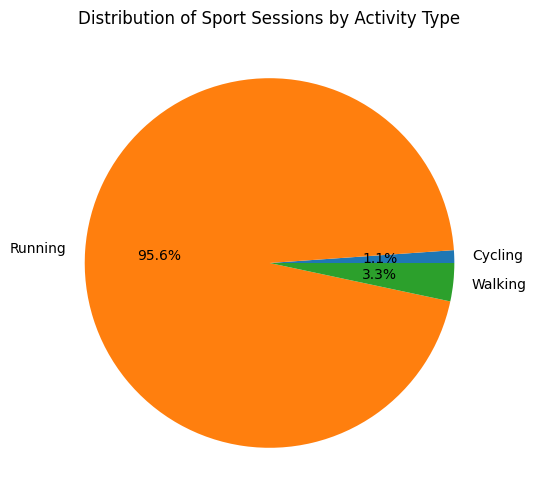

In [ ]:
# @title Display the number of sport sessions per activity type
import matplotlib.pyplot as plt

sport_type_counts = sessions_df.groupby('activity')['activity'].count()
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sport_type_counts, labels=activity_names, autopct='%1.1f%%')
plt.title('Distribution of Sport Sessions by Activity Type')
plt.show()

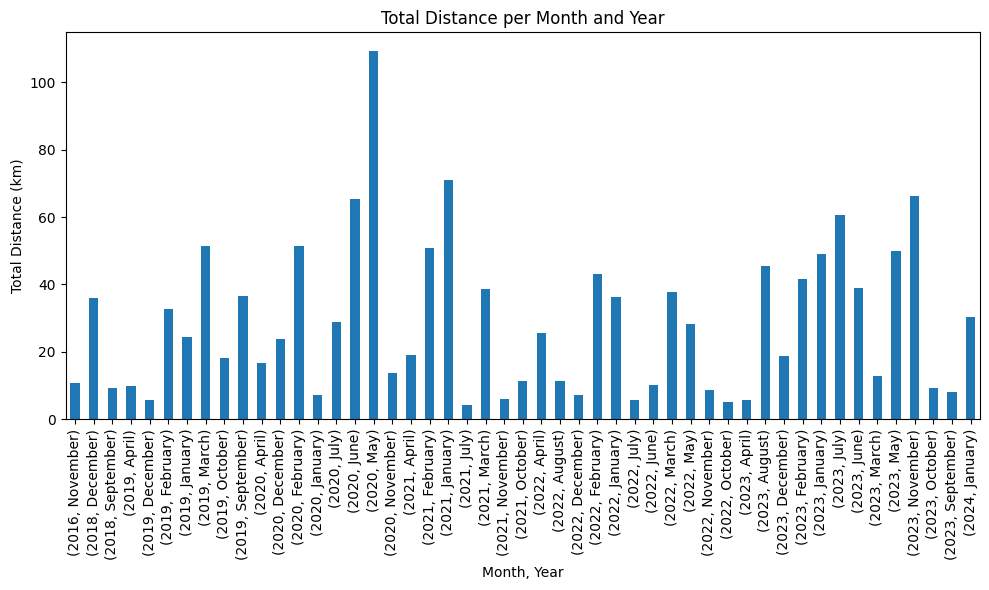

In [ ]:
# @title Compute The Total Distance Per Month
import calendar
import matplotlib.pyplot as plt

# Extract month and year from start_time and create new columns 'month' and 'year'
sessions_df['month'] = sessions_df['start_time'].dt.month
sessions_df['year'] = sessions_df['start_time'].dt.year

# Map month number to month name
sessions_df['month'] = sessions_df['month'].apply(lambda x: calendar.month_name[x])

# Group activity per month and year and calculate sum of distance
distance_per_month_year = sessions_df.groupby(['year', 'month'])['distance'].sum()/1000

# Plot sum of distance per month
plt.figure(figsize=(12, 8))  # Adjust figure size
distance_per_month_year.plot(kind='bar', xlabel='Month, Year', ylabel='Total Distance (km)', title='Total Distance per Month and Year', figsize=(10, 6))
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout

plt.show()

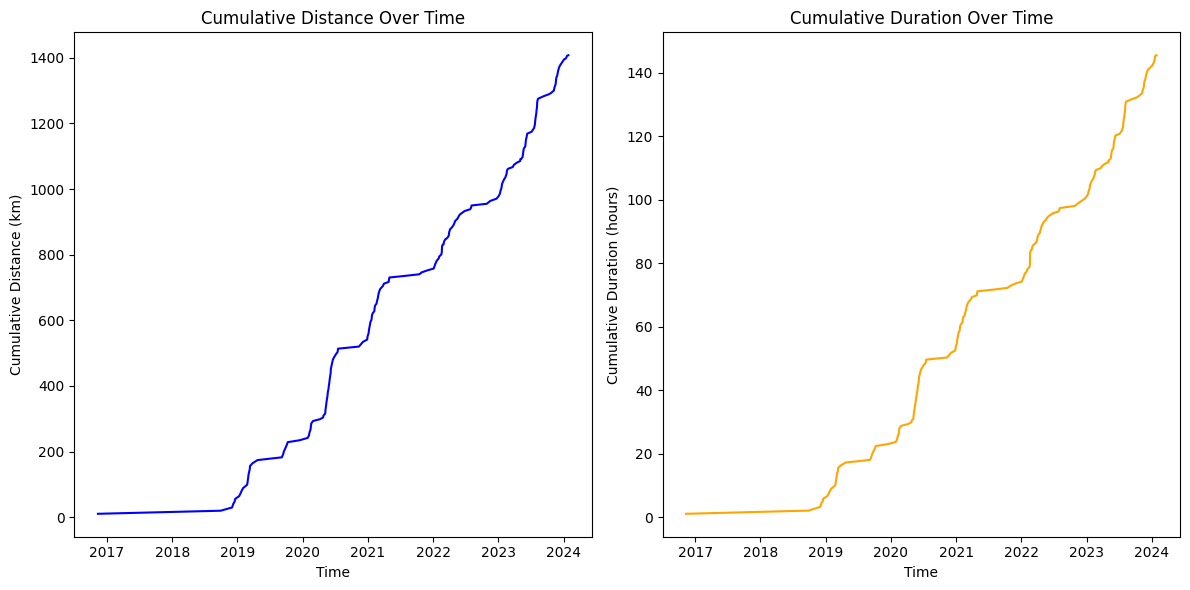

In [ ]:
# @title Compute the cumulative distance and duration over time
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'start_time' column is in datetime format, if not convert it using pd.to_datetime()
sessions_df['start_time'] = pd.to_datetime(sessions_df['start_time'])

# Sort the dataframe by start_time
sessions_df.sort_values(by='start_time', inplace=True)

# Calculate cumulative sum of distance and duration
sessions_df['cumulative_distance'] = sessions_df['distance'].cumsum() / 1000
sessions_df['cumulative_duration'] = sessions_df['duration'].cumsum() / 3600

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot cumulative distance over time
ax1.plot(sessions_df['start_time'], sessions_df['cumulative_distance'], color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cumulative Distance (km)')
ax1.set_title('Cumulative Distance Over Time')

# Plot cumulative duration over time
ax2.plot(sessions_df['start_time'], sessions_df['cumulative_duration'], color='orange')
ax2.set_xlabel('Time')
ax2.set_ylabel('Cumulative Duration (hours)')
ax2.set_title('Cumulative Duration Over Time')

plt.tight_layout()  # Adjust layout
plt.show()


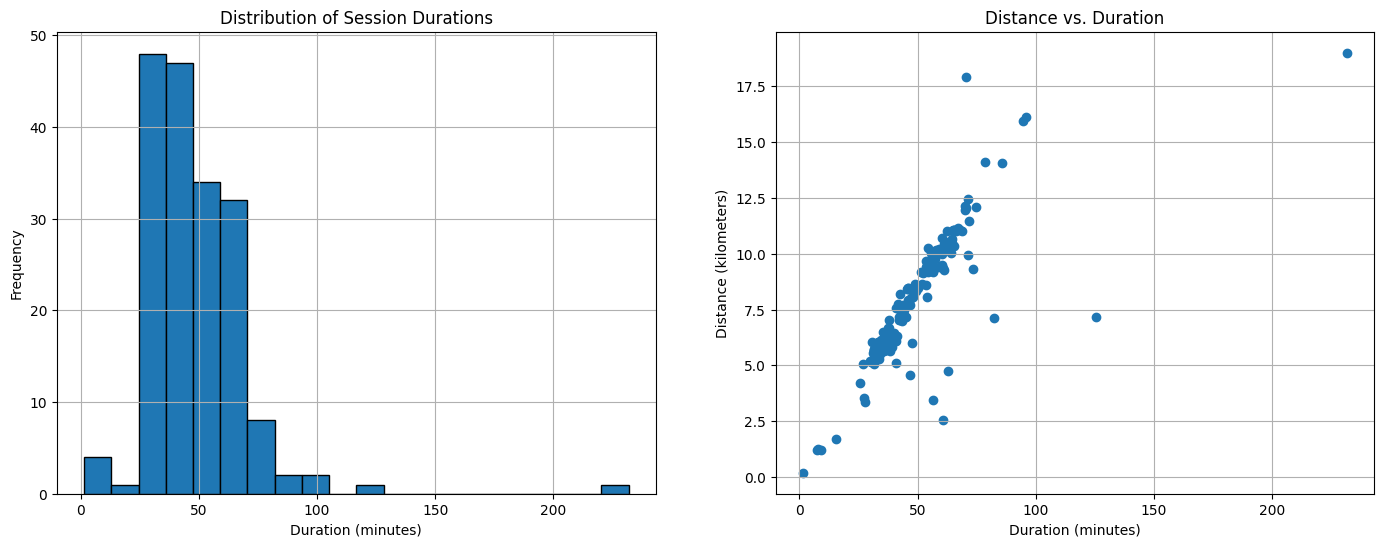

In [ ]:
# @title Compute the distribution of Sessions Durations
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 6))

#  Duration distribution
plt.subplot(1, 2, 1)
plt.hist(sessions_df["duration"]/60, bins=20, edgecolor='black')
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Session Durations")
plt.grid(True)

# Distance versus duration
plt.subplot(1, 2, 2)
plt.scatter(sessions_df["duration"]/60, sessions_df["distance"]/1000)
plt.xlabel("Duration (minutes)")
plt.ylabel("Distance (kilometers)")
plt.title("Distance vs. Duration")
plt.grid(True)


plt.show()

In [ ]:
fastest_segments_df.columns
fastest_segments_df.head()

,distance,duration,started_at,sessions_id,id
0,1km,355.875,2023-01-12 06:36:57.871000+00:00,c6e97b06-7290-4c3b-9621-357fb9ea7128,c6e97b06-7290-4c3b-9621-357fb9ea7128-0
1,1mi,577.543,2023-01-12 06:36:38.871000+00:00,c6e97b06-7290-4c3b-9621-357fb9ea7128,c6e97b06-7290-4c3b-9621-357fb9ea7128-1
2,3mi,1765.324,2023-01-12 06:22:35.367000+00:00,c6e97b06-7290-4c3b-9621-357fb9ea7128,c6e97b06-7290-4c3b-9621-357fb9ea7128-2
3,5km,1824.766,2023-01-12 06:22:02.863000+00:00,c6e97b06-7290-4c3b-9621-357fb9ea7128,c6e97b06-7290-4c3b-9621-357fb9ea7128-3
4,1km,307.549,2020-06-10 10:31:44.524000+00:00,85de2d1f-6cc8-40ac-8c04-5db9245aacbb,85de2d1f-6cc8-40ac-8c04-5db9245aacbb-0


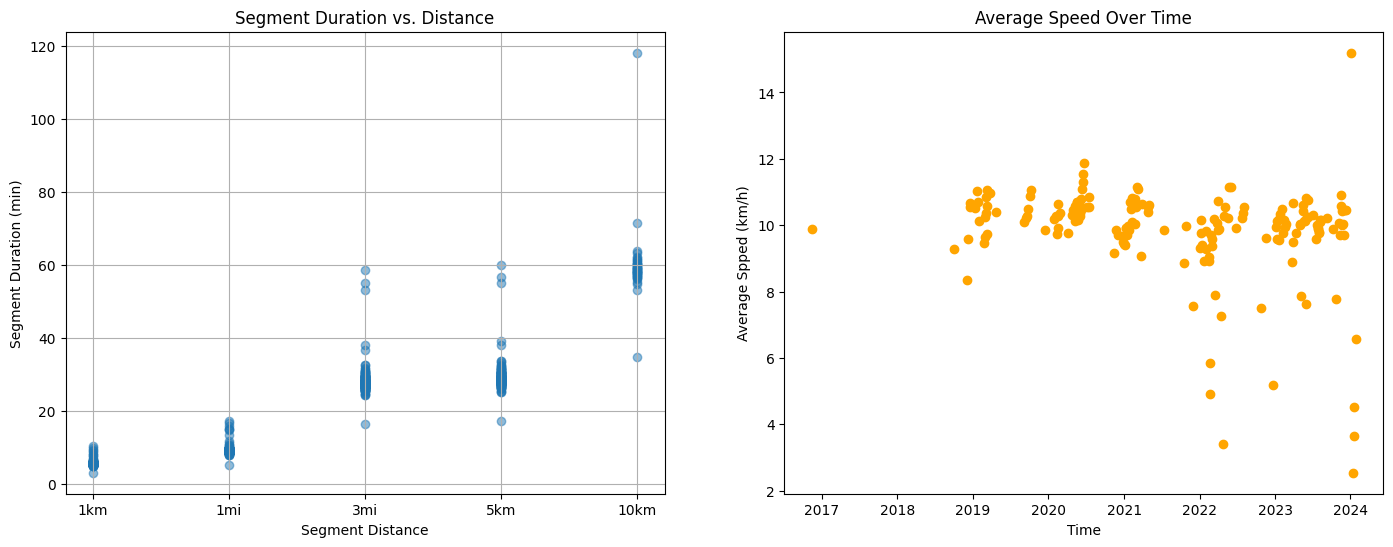

In [ ]:
# @title Display the distribution of segment duration vs distance
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'started_at' column is in datetime format, if not convert it using pd.to_datetime()
fastest_segments_df['started_at'] = pd.to_datetime(fastest_segments_df['started_at'])

plt.figure(figsize=(17, 6))
# Create a scatter plot of segment duration vs. distance

plt.subplot(1, 2, 1)
plt.scatter(fastest_segments_df['distance'], fastest_segments_df['duration']/60, alpha=0.5)
plt.xlabel('Segment Distance')
plt.ylabel('Segment Duration (min)')
plt.title('Segment Duration vs. Distance')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(sessions_df['start_time'], sessions_df['average_speed'], color='orange')
plt.xlabel('Time')
plt.ylabel('Average Spped (km/h)')
plt.title('Average Speed Over Time')
plt.show()



In [ ]:
# @title Load the data into  postgres for further analysis
import sqlalchemy as sa

# Extract the connection string from the notebook secrets
conn_string = userdata.get('postgres_conn_string')
engine = sa.create_engine(conn_string)

sessions_table = "sessions"
fastest_segments_table = "fastest_segments"

# Load the sessions data
sessions_df.to_sql(sessions_table, engine, if_exists='replace')

# Load the fastest segments
fastest_segments_df.to_sql(fastest_segments_table, engine, if_exists='replace')

# Destroy the engine
engine.dispose()

print("All data have been loaded successfully in postgres")

# TODO Add primary and foreign keys

All data have been loaded successfully in postgres
